# correlation between pyfeat and human average

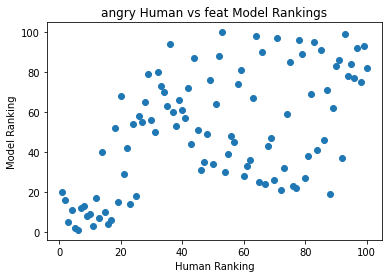

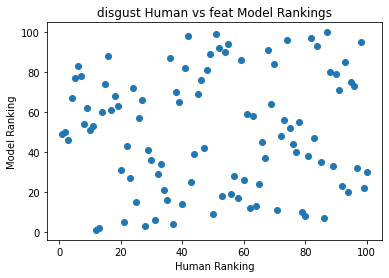

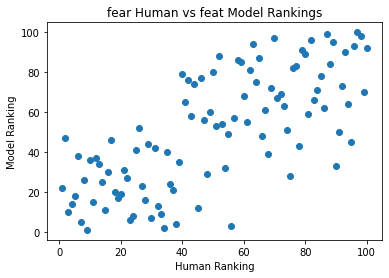

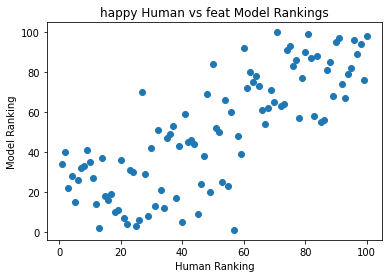

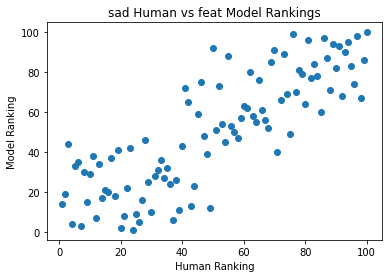

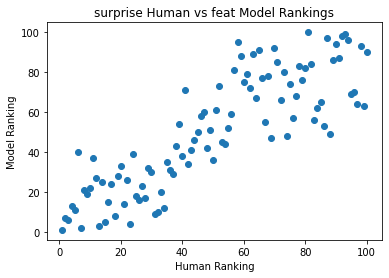

In [21]:
# plot a scatter plot of the data, with the x-axis being the ranking order of humandata, and the y-axis being the ranking order of the model data
import human_data
import matplotlib.pyplot as plt

l_feat = human_data.feat_order
l_human = human_data.average_human_order


def plot_scatter(emo, human_data, model_data):
    plt.figure(figsize=(6, 4))
    plt.scatter(human_data, model_data)
    plt.xlabel('Human Ranking')
    plt.ylabel('Model Ranking')
    plt.title(f'{emo} Human vs feat Model Rankings')
    plt.savefig(f'image_analysis/correlation/{emo}_feat_correlation_scatter_plot.jpg', dpi=300, bbox_inches='tight')
#     plt.show()

for emo in l_human.keys():
#     print(l_human[emo])
    # transfer the name list to number rankings
    l_human_num = list(range(1, 101))
    l_feat_num = []
    for i in l_human[emo]:
        l_feat_num.append(l_feat[emo].index(i)+1)
    plot_scatter(emo, l_human_num, l_feat_num)


In [1]:
from scipy.stats import spearmanr
import human_data

l_feat = human_data.feat_order
l_human = human_data.average_human_order

for k in l_feat.keys():
    rho, pvalue = spearmanr(l_feat[k], l_human[k])
    rho, pvalue = spearmanr(l_feat[k], l_human[k])
    print(f"{k} Spearman's Rank Correlation: {rho} , p-value: {pvalue}")

angry Spearman's Rank Correlation: 0.10041404140414038 , p-value: 0.3202077817873026
disgust Spearman's Rank Correlation: 0.022538253825382538 , p-value: 0.823864597000031
fear Spearman's Rank Correlation: -0.022058205820582055 , p-value: 0.8275574498727498
happy Spearman's Rank Correlation: 0.0594059405940594 , p-value: 0.5571301785976639
sad Spearman's Rank Correlation: -0.027026702670267026 , p-value: 0.7895324091920614
surprise Spearman's Rank Correlation: 0.10507050705070506 , p-value: 0.29816426977622845


In [2]:
# type 2, compute top 50
from scipy.stats import spearmanr
import human_data

l_feat = human_data.feat_order
l_human = human_data.average_human_order

for k in l_human.keys():
    l1 = l_human[k][:50]
    l2 = [i for i in l_feat[k] if i in l1]
    # print(l1, l2)
    rho, p = spearmanr(l1, l2)
    print(f"{k} Spearman's Rank Correlation: {rho} , p: {p}")

angry Spearman's Rank Correlation: -0.12585834333733492 , p: 0.3838012075196312
disgust Spearman's Rank Correlation: -0.18857142857142856 , p: 0.18969647327179168
fear Spearman's Rank Correlation: 0.06372148859543818 , p: 0.6602052542921981
happy Spearman's Rank Correlation: -0.15563025210084033 , p: 0.28048500819769
sad Spearman's Rank Correlation: -0.1771428571428571 , p: 0.21844701956592902
surprise Spearman's Rank Correlation: 0.09973589435774309 , p: 0.4907458783653835


# Correlation between ranknet and human average

## calculate ranknet ranking

In [3]:
import intensityNet
from feat import Detector
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')


/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet


In [4]:

def setIntensityModel(target_emotion, facebox):
    # Load the model
    # ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']
    print("target_emotion:", target_emotion)
    if target_emotion.lower() in ["anger", 'angry']:
        model_path = "new_models/angry_fold3_epoch7.pt"
    elif target_emotion.lower() in ["disgust"]:
        model_path = "new_models/disgust_fold3_epoch7.pt"
    elif target_emotion.lower() in ["fear"]:
        model_path = "new_models/fear_fold3_epoch6.pt"
    elif target_emotion.lower() in ["happiness", "happy"]:
        model_path = "new_models/happy_fold2_epoch7.pt"
    elif target_emotion.lower() in ["sadness", "sad"]:
        model_path = "new_models/sad_fold2_epoch6.pt"
    elif target_emotion.lower() in ["surprise"]:
        model_path = "new_models/surprise_fold3_epoch5.pt"
    else:
        model_path = ""

    assert facebox, "facebox is empty"
    model = intensityNet.IntensityNet_type1(model_path, facebox)
    return model

def get_target(emotion_name):
    # Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
    # or lowercase
    if emotion_name in ["Anger", "anger"]:
        return 0
    elif emotion_name in ["Disgust", "disgust"]:
        return 1
    elif emotion_name in ["Fear", "fear"]:
        return 2
    elif emotion_name in ["Happiness", "happiness"]:
        return 3
    elif emotion_name in ["Sadness", "sadness"]:
        return 4
    elif emotion_name in ["Surprise", "surprise"]:
        return 5
    elif emotion_name in ["Neutral", "neutral"]:
        return 6
    
image_name = f'image_analysis/Exp_collections/pairwise_experiment_images/anger_selected_imgonly100/an_0.png'
facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
print(facebox)
res_dic = {}
for target_emotion in ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']:
    # target_emotion = 'anger'

    folder = f'image_analysis/Exp_collections/pairwise_experiment_images/{target_emotion}_selected_imgonly100'
    model = setIntensityModel(target_emotion, facebox)
    result = []
    for file in os.listdir(folder):
        if 'png' in file:
            image_name = os.path.join(folder, file)
            detection_res = model.detect_emo(Image.open(image_name))
            detection_res = detection_res.tolist()
            output = detection_res[get_target(target_emotion)]
            result.append([file, output])
    res_dic[target_emotion] = result

[223.77744, 107.24127, 416.5465, 371.9786]
target_emotion: anger
use_gpu: True
target_emotion: disgust
use_gpu: True
target_emotion: fear
use_gpu: True
target_emotion: happiness
use_gpu: True
target_emotion: sadness
use_gpu: True
target_emotion: surprise
use_gpu: True


In [ ]:
res_dic

In [6]:
# sort the resdic
l_rank = {}
for k, v in res_dic.items():
    res_dic[k] = sorted(v, key=lambda x: x[1], reverse=True)
    l_rank[k] = [name[0] for name in res_dic[k]]

# print(l_rank)

In [14]:
# l_rank

In [10]:
# l_human

['an_490.png', 'an_449.png', 'an_497.png', 'an_437.png', 'an_467.png', 'an_433.png', 'an_469.png', 'an_499.png', 'an_489.png', 'an_484.png', 'an_463.png', 'an_496.png', 'an_461.png', 'an_440.png', 'an_494.png', 'an_481.png', 'an_485.png', 'an_157.png', 'an_488.png', 'an_495.png', 'an_460.png', 'an_416.png', 'an_468.png', 'an_271.png', 'an_491.png', 'an_16.png', 'an_15.png', 'an_474.png', 'an_9.png', 'an_290.png', 'an_4.png', 'an_153.png', 'an_253.png', 'an_441.png', 'an_95.png', 'an_400.png', 'an_358.png', 'an_79.png', 'an_75.png', 'an_351.png', 'an_174.png', 'an_211.png', 'an_5.png', 'an_6.png', 'an_65.png', 'an_25.png', 'an_20.png', 'an_81.png', 'an_42.png', 'an_11.png', 'an_59.png', 'an_18.png', 'an_381.png', 'an_17.png', 'an_24.png', 'an_64.png', 'an_58.png', 'an_345.png', 'an_339.png', 'an_71.png', 'an_12.png', 'an_14.png', 'an_333.png', 'an_236.png', 'an_32.png', 'an_143.png', 'an_21.png', 'an_158.png', 'an_31.png', 'an_56.png', 'an_204.png', 'an_54.png', 'an_10.png', 'an_451.png

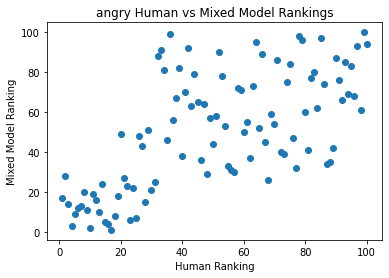

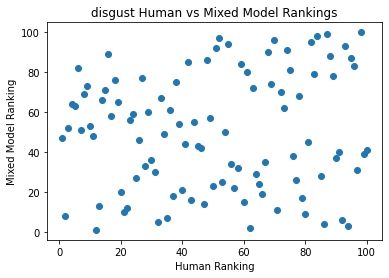

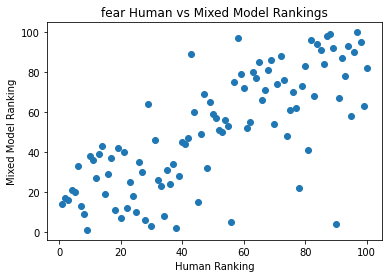

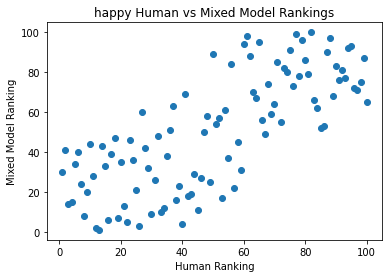

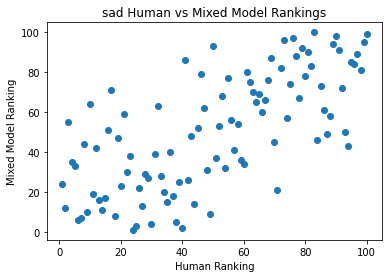

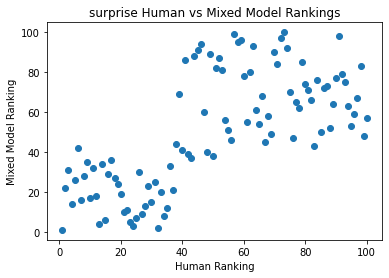

In [11]:
# plot a scatter plot of the data, with the x-axis being the ranking order of humandata, and the y-axis being the ranking order of the model data
import human_data
import matplotlib.pyplot as plt

# l_rank = human_data.feat_order
l_human = human_data.average_human_order
l_rank = l_rank

def plot_scatter(emo, human_data, model_data):
    plt.figure(figsize=(6, 4))
    plt.scatter(human_data, model_data)
    plt.xlabel('Human Ranking')
    plt.ylabel('Mixed Model Ranking')
    plt.title(f'{emo} Human vs Mixed Model Rankings')
    plt.savefig(f'image_analysis/correlation/{emo}_mixed_correlation_scatter_plot.jpg', dpi=300, bbox_inches='tight')
#     plt.show()

for emo in l_human.keys():
    print(l_human[emo])
    # transfer the name list to number rankings
    l_human_num = list(range(1, 101))
    l_rank_num = []
    if emo == 'angry':
        emoo = 'anger'
    elif emo == 'happy':
        emoo = 'happiness'
    elif emo == 'sad':
        emoo = 'sadness'
    else:
        emoo = emo
        
    for i in l_human[emo]:
        l_rank_num.append(l_rank[emoo].index(i)+1)
    plot_scatter(emo, l_human_num, l_rank_num)

In [ ]:
from scipy.stats import spearmanr
import human_data

l_feat = human_data.feat_order
l_human = human_data.average_human_order

for k in l_feat.keys():
    rho, pvalue = spearmanr(l_feat[k], l_human[k])
    rho, pvalue = spearmanr(l_feat[k], l_human[k])
    print(f"{k} Spearman's Rank Correlation: {rho} , p-value: {pvalue}")

In [ ]:
for k in l_human.keys():
    l1 = l_human[k][:50]
    l2 = [i for i in l_feat[k] if i in l1]
    # print(l1, l2)
    rho, p = spearmanr(l1, l2)
    print(f"{k} Spearman's Rank Correlation: {rho} , p: {p}")

In [18]:
newres = sorted(result, key=lambda x:x[1])

In [ ]:
newres

In [22]:
newmodel_order = [name[0] for name in newres]
newmodel_order.reverse()

In [26]:
newmodel_order = [x for x in newmodel_order if x in human_data.feat_order['angry']]

In [30]:

from scipy.stats import spearmanr
import human_data

l_feat = human_data.feat_order
l_human = human_data.average_human_order

l1 = l_human['angry']
l2 = newmodel_order
rho, pvalue = spearmanr(l1, l2)
print(f"angry Spearman's Rank Correlation: {rho}, p-value:{pvalue}")


# type 2, compute top 50

l1_50 = l1[:50]
l2_50 = [i for i in l2 if i in l1_50]
    # print(l1, l2)
rho, p = spearmanr(l1_50, l2_50)
print(f"angry Spearman's Rank Correlation: {rho}, p: {p}")

# for k in l_feat.keys():
#     rho, pvalue = spearmanr(l_feat[k], l_human[k])
#     rho, pvalue = spearmanr(l_feat[k], l_human[k])
#     print(f"{k} Spearman's Rank Correlation: {rho}, p-value:{pvalue}")

angry Spearman's Rank Correlation: 0.09947794779477948, p-value:0.3247627058257787
angry Spearman's Rank Correlation: 0.2508043217286915, p: 0.07895221712481992


In [22]:
facebox

[223.77744, 107.24127, 416.5465, 371.9786]

In [25]:
def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y

print(get_box(facebox[0], facebox[1], facebox[2], facebox[3]))



(194, 113, 445, 364)


(-0.5, 250.5, 250.5, -0.5)

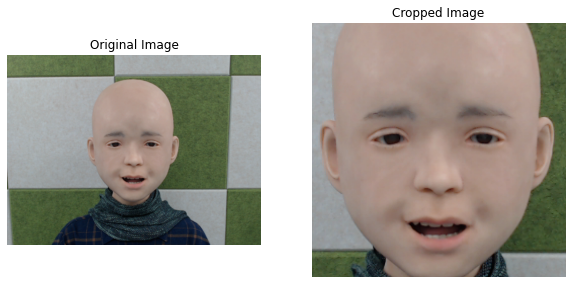

In [31]:

frame = Image.open(image_name)
start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
face = frame.crop((start_x, start_y, end_x, end_y))

# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Original image
axes[0].imshow(frame)
axes[0].set_title("Original Image")
axes[0].axis("off")
# Cropped image
axes[1].imshow(face)
axes[1].set_title("Cropped Image")
axes[1].axis("off")